In [30]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2023.03.1


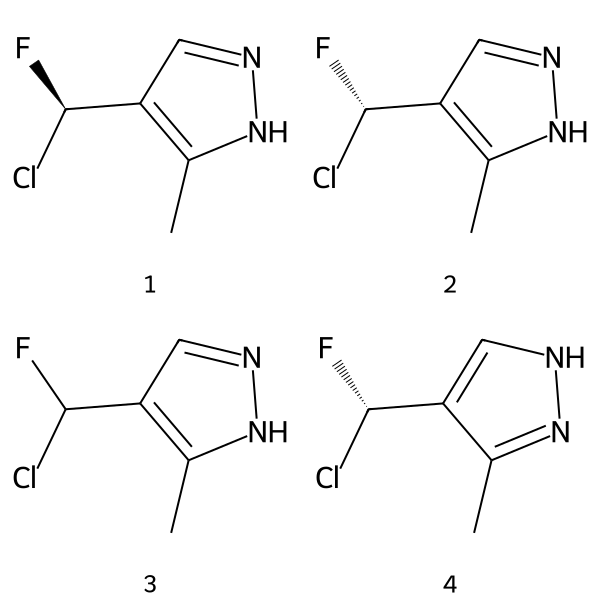

In [31]:
smis = ["Cc1[nH]ncc1[C@H](F)Cl","Cc1[nH]ncc1[C@@H](F)Cl","Cc1[nH]ncc1[CH](F)Cl","Cc1n[nH]cc1[C@@H](F)Cl"]
ms = [Chem.MolFromSmiles(smi) for smi in smis]
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.legendFontSize=24
Draw.MolsToGridImage(ms,legends=[str(i+1) for i in range(len(ms))],molsPerRow=2,subImgSize=(300,300))

In [32]:
import lwreg

# set the name of the database we'll work with:
config = lwreg.utils.defaultConfig()
config['dbname'] = 'jupyter_demo.sqlt'

Initialize the database. **Note** that this erases everything in the current database, so be very careful with this command!

In [33]:
lwreg.initdb(config=config,confirm='yes')

True

Register all of our compounds at once:

In [34]:
# The RDKit standardizer is quite verbose by default, make it be quiet:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')

In [36]:
lwreg.bulk_register(mols=ms,config=config)

(None, None, None, None)

Do some queries:

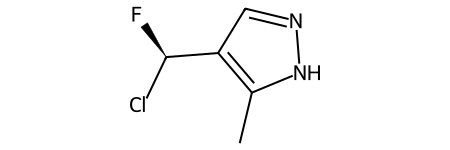

In [38]:
Chem.MolFromSmiles('Cc1[nH]ncc1[C@H](F)Cl')

In [37]:
lwreg.query(smiles='Cc1[nH]ncc1[C@H](F)Cl',config=config)

[1]

Query using just the `no_stereo_smiles` layer. This pays attention to tautomers but ignores stereochemistry:

In [43]:
lwreg.query(smiles='Cc1[nH]ncc1[C@H](F)Cl',
            layers=lwreg.utils.HashLayer.NO_STEREO_SMILES,config=config)

[1, 2, 3]

Retrieve the structures of the molecules corresponding to that query:

In [45]:
res = lwreg.retrieve(ids=[1,2,3,78],config=config)
len(res)

3

In [48]:
ids = [1,2,3,56,23,-1]
res = lwreg.retrieve(ids=ids,config=config)
len(res)

3

In [49]:
ids_found = [x[0] for x in res]
ids_found

[1, 2, 3]

In [50]:
set(ids).difference(ids_found)

{-1, 23, 56}

In [46]:
res[0]

(1,
 '\n     RDKit          2D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 9 9 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 2.775976 0.000000 0.000000 0\nM  V30 2 C 1.275976 0.000000 0.000000 0\nM  V30 3 N 0.394298 1.213525 0.000000 0\nM  V30 4 N -1.032286 0.750000 0.000000 0\nM  V30 5 C -1.032286 -0.750000 0.000000 0\nM  V30 6 C 0.394298 -1.213525 0.000000 0\nM  V30 7 C 0.857824 -2.640110 0.000000 0\nM  V30 8 F -0.145872 -3.754828 0.000000 0\nM  V30 9 Cl 2.325045 -2.951978 0.000000 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 1 1 2\nM  V30 2 1 2 3\nM  V30 3 1 3 4\nM  V30 4 2 4 5\nM  V30 5 1 5 6\nM  V30 6 1 6 7\nM  V30 7 1 7 8 CFG=1\nM  V30 8 1 7 9\nM  V30 9 2 6 2\nM  V30 END BOND\nM  V30 END CTAB\nM  END\n',
 'mol')

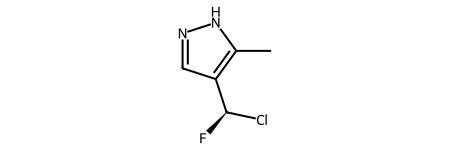

In [47]:
Chem.MolFromMolBlock(res[0][1])

Register a bunch more molecules, these are molecules from ChEMBL:

In [51]:
!head -3 ./demo_data/S1P1_data.csv

"doc_id","molregno","standard_relation","standard_value","standard_units","standard_flag","standard_type","pchembl_value","canonical_smiles","compound_chembl_id"
5839,189018,"=",82,"nM",1,"EC50",7.09,"CCCCCCCCc1ccc(NC(=O)[C@@H](N)COP(=O)(O)O)cc1.OC(=O)C(F)(F)F","CHEMBL332050"
5839,188442,"=",322.1,"nM",1,"EC50",6.49,"CCCCCCCCCCCCCCONC(=O)[C@@H](N)COP(=O)(O)O.OC(=O)C(F)(F)F","CHEMBL115505"


In [52]:
import csv
with open('./demo_data/S1P1_data.csv','r') as inf:
    rdr = csv.reader(inf)
    smis = [x[8] for x in rdr]
    smis.pop(0)
mols = [Chem.MolFromSmiles(x) for x in smis[:100]]

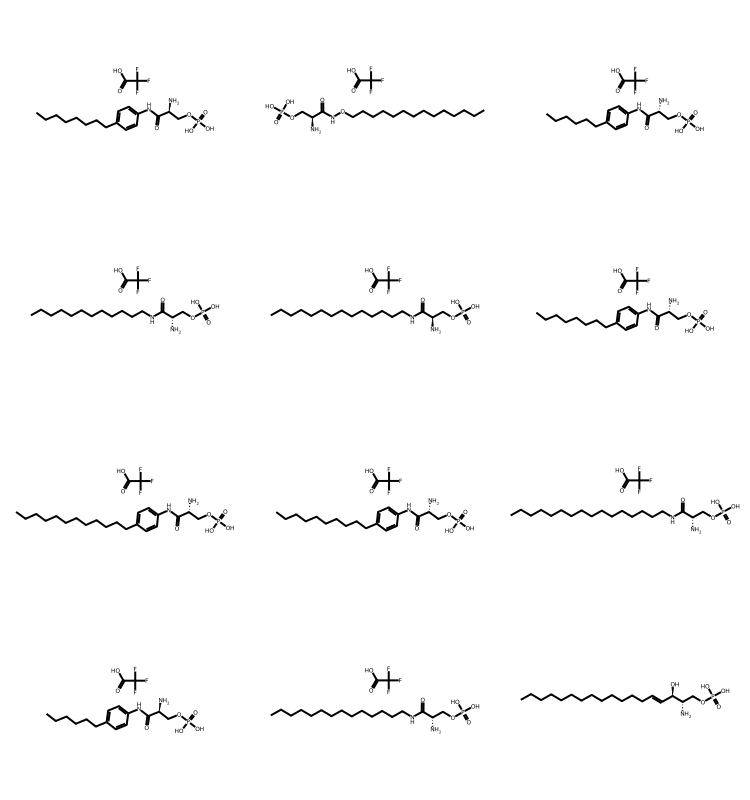

In [53]:
Draw.MolsToGridImage(mols[:12],molsPerRow=3,subImgSize=(250,200))

In [54]:
new_ids = lwreg.bulk_register(mols=mols,config=config)

In [55]:
len(new_ids)

100

We end up with `None` in the new_id list for molecules which are duplicates:

In [56]:
new_ids.count(None)

4

In [61]:
regno,molb,fmt = lwreg.retrieve(ids=[43],config=config)[0]

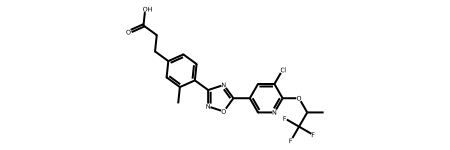

In [62]:
Chem.MolFromMolBlock(molb)

# Simple 3D demo

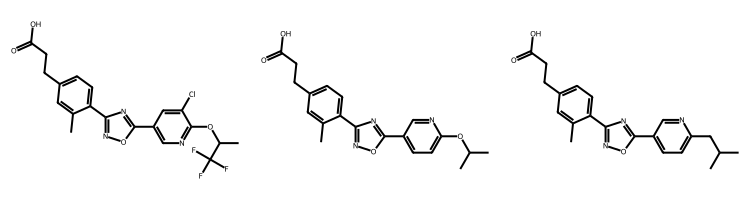

In [17]:
tpls = lwreg.retrieve(ids=[43,44,45],config=config)
m3ds = [Chem.MolFromMolBlock(y) for x,y,z in tpls]
Draw.MolsToGridImage(m3ds,molsPerRow=3,subImgSize=(250,200))

In [19]:
from rdkit.Chem import rdDistGeom
m3ds = [Chem.AddHs(x) for x in m3ds]
ps = rdDistGeom.ETKDGv3()
ps.randomSeed = 0xf00d
ps.pruneRmsThresh = 1.0
for m in m3ds:
    rdDistGeom.EmbedMultipleConfs(m,5,params=ps)

Just look at some conformers for fun, you need py3dmol installed for this to work:

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

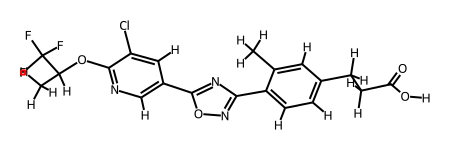

In [20]:
IPythonConsole.ipython_3d = True
m3ds[0]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

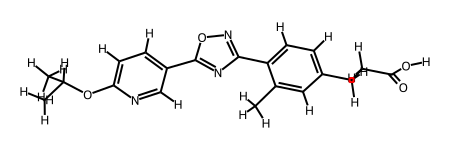

In [21]:
m3ds[1]

Split the multi-conf molecules into single mols:

In [22]:
regMs = []
for m3d in m3ds:
    noconfs = Chem.Mol(m3d)
    noconfs.RemoveAllConformers()
    for conf in m3d.GetConformers():
        tm = Chem.Mol(noconfs)
        tm.AddConformer(conf)
        regMs.append(tm)

In [23]:
len(regMs)

10

## now actually register

In [27]:
# set the name of the database we'll work with:
config3d = lwreg.utils.defaultConfig()
config3d['dbname'] = 'demo3d.sqlt'
lwreg.initdb(config=config3d,confirm='yes')

True

In [28]:
for m in regMs:
    lwreg.register(mol=m,config=config3d,escape=f"conformer {m.GetConformer().GetId()}")